In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
dataset = pd.read_csv("social_media_marketing_dataset.csv")

In [3]:
dataset

,Age,Gender,Income,Region,Days_Since_Last_Purchase,Number_of_Friends_Followers,Engagement_Rate,Time_Spent_on_Platform_Daily,Product_Category_Preference,Previous_Purchases_in_Category,Buy_Decision
0,56,0,65648,2,148,4301,0.673702,147,8,15,1
1,69,0,145991,2,27,4038,0.767499,170,3,8,1
2,46,0,160588,1,309,972,0.307530,147,6,1,0
3,32,1,135005,4,64,2965,0.492054,9,4,4,1
4,60,0,22396,5,355,3000,0.796509,87,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,60,1,156998,2,238,3194,0.215156,16,2,15,0
996,64,0,124555,3,194,292,0.627468,81,5,11,1
997,62,1,29496,4,165,4135,0.923665,45,6,16,1
998,35,0,76447,4,221,220,0.997518,134,1,4,0


In [4]:
X = dataset.drop('Buy_Decision', axis=1)
y = dataset['Buy_Decision']

In [5]:
categorical_features = ['Gender', 'Region', 'Product_Category_Preference']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(X[categorical_features]).toarray()  # Convert sparse matrix to numpy array
encoded_cols = encoder.get_feature_names_out(categorical_features)
encoded_X = pd.DataFrame(encoded_data, columns=encoded_cols)
final_X = pd.concat([X.drop(columns=categorical_features), encoded_X], axis=1)

In [6]:
scaler = MinMaxScaler()
continuous_features = ['Age', 'Income', 'Days_Since_Last_Purchase', 'Number_of_Friends_Followers', 'Engagement_Rate', 'Time_Spent_on_Platform_Daily', 'Previous_Purchases_in_Category']
final_X[continuous_features] = scaler.fit_transform(final_X[continuous_features])

In [7]:
final_X

,Age,Income,Days_Since_Last_Purchase,Number_of_Friends_Followers,Engagement_Rate,Time_Spent_on_Platform_Daily,Previous_Purchases_in_Category,Gender_0,Gender_1,Region_1,...,Region_5,Product_Category_Preference_1,Product_Category_Preference_2,Product_Category_Preference_3,Product_Category_Preference_4,Product_Category_Preference_5,Product_Category_Preference_6,Product_Category_Preference_7,Product_Category_Preference_8,Product_Category_Preference_9
0,0.745098,0.252952,0.406593,0.858995,0.675317,0.816092,0.789474,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.699756,0.074176,0.805713,0.769365,0.948276,0.421053,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.549020,0.780933,0.848901,0.184562,0.308166,0.816092,0.052632,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.274510,0.638660,0.175824,0.588331,0.493184,0.022989,0.210526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.823529,0.012418,0.975275,0.595421,0.798453,0.471264,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.823529,0.760968,0.653846,0.634724,0.215544,0.063218,0.789474,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.901961,0.580546,0.532967,0.046799,0.628960,0.436782,0.578947,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,0.862745,0.051903,0.453297,0.825365,0.925949,0.229885,0.842105,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,0.333333,0.313007,0.607143,0.032212,1.000000,0.741379,0.210526,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y_encoded, test_size=0.2, random_state=42)

In [11]:
distance_metrics = ['euclidean', 'manhattan', 'distance']
k_values = [1, 3, 5, 7, 9]
accuracy_scores_distance = {}

# Applying KNN with different distance metrics and k values
for metric in distance_metrics:
    accuracy_scores_distance[metric] = {}
    for k in k_values:
        # For weighted distances, weights are inversely proportional to distance
        if metric == 'distance':
            knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test.values)
        accuracy_scores_distance[metric][k] = accuracy_score(y_test, y_pred)

accuracy_scores_distance

{'euclidean': {1: 0.55, 3: 0.59, 5: 0.555, 7: 0.54, 9: 0.53},
 'manhattan': {1: 0.57, 3: 0.56, 5: 0.545, 7: 0.54, 9: 0.56},
 'distance': {1: 0.55, 3: 0.59, 5: 0.55, 7: 0.54, 9: 0.54}}

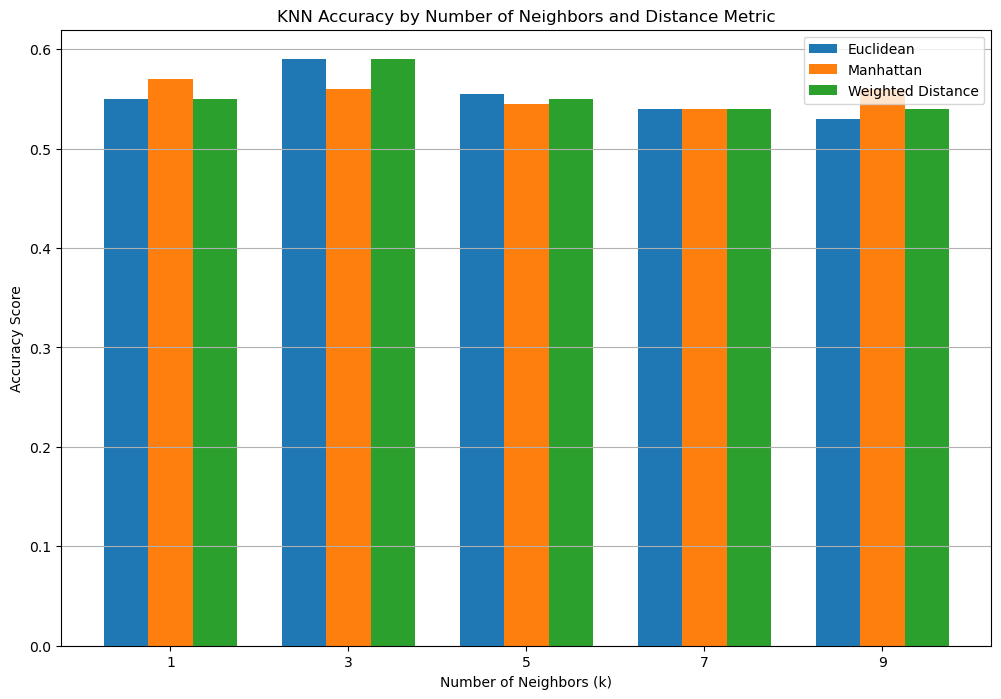

In [12]:
import matplotlib.pyplot as plt



metric_labels = ['Euclidean', 'Manhattan', 'Weighted Distance']  # Labels for the bars, adjust as needed

# Setting up the figure
plt.figure(figsize=(12, 8))

# The width of the bars
bar_width = 0.25

# Set positions of the bars
positions = np.arange(len(k_values))

# Plotting each metric's accuracy scores for each k value
for i, metric in enumerate(distance_metrics):
    accuracies = [accuracy_scores_distance[metric][k] for k in k_values]
    plt.bar(positions + i * bar_width, accuracies, width=bar_width, label=metric_labels[i])

# Customization
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy by Number of Neighbors and Distance Metric')
plt.xticks(positions + bar_width, k_values)
plt.legend()
plt.grid(axis='y')

plt.show()

